In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

In [2]:
def table_zeros(N):
    """
    Table of zeros
    Gives a np.array of zeros of
    N x N dimensions 
    """
    table = np.zeros((N, N))
    return table

def create_table(N, arr):
    """
    Creates a table with not-null entries
    in the positions of arr
    """
    table = table_zeros(N)
    for i in range(len(arr)):
        table[arr[i, 0], arr[i, 1]] = 1
    return table 

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    pass

def sorround_zeros(T):
    ans = np.pad(T, 1, pad_with, padder = 0)
    return ans    

def sum_neighbours(T, i, j):
    T_pad = sorround_zeros(T)
    i += 1
    j += 1
    above_sum = T_pad[i-1, j-1] + T_pad[i-1, j] + T_pad[i-1, j+1]
    middle_sum = T_pad[i, j-1] + T_pad[i, j+1]
    below_sum = T_pad[i+1, j-1] + T_pad[i+1, j] + T_pad[i+1, j+1]
    return above_sum + middle_sum + below_sum

def evolve_matrix(T):
    T_new = np.copy(T)
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            if T[i, j] == 1:
                if sum_neighbours(T, i, j) > 3:
                    T_new[i, j] = 0
                elif sum_neighbours(T, i, j) < 2:
                    T_new[i, j] = 0
            elif T[i, j] == 0 and sum_neighbours(T, i, j) == 3:
                T_new[i, j] = 1
    return T_new

def evolve_n_steps(T, steps):
    if steps == 0:
        return T
    if steps > 0:
        T_new = evolve_matrix(T)
        return evolve_n_steps(T_new, steps - 1)
    
def list_of_frames(T, steps):
    if steps == 0:
        return np.array([T])
    if steps > 0:
        T_new = evolve_matrix(T)
        ans = np.concatenate(( np.array([T]), list_of_frames(T_new, steps - 1) ))
    return ans


In [3]:
T = create_table(5, np.array([[1, 2], [2, 2], [3,2]]))
T_new = evolve_matrix(T)
frames = list_of_frames(T, 50)

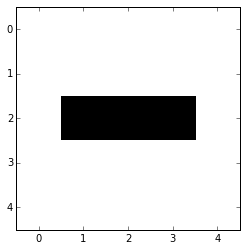

In [18]:
fig = plt.figure()
i = 0
im = plt.imshow(frames[0], cmap = 'Greys', interpolation='nearest', animated=True)

def updatefig(*args):
    global i
    if (i < len(frames) - 1):
        i += 1
    else:
        i=0
    im.set_array(frames[i])
    return im,

ani = animation.FuncAnimation(fig, updatefig,  blit=True, interval = 100)
plt.show()

ani.save("movie_test.mp4")

#from google.colab import files
#files.download("movie_test.mp4")